In [166]:
"""
It consists of scraping the following information from IMDB adventures movies:

Movie name
Description
Release Date
Director Name
Rating
Duration
Genre
Stars (Actors)
Filming Dates
"""

'\nIt consists of scraping the following information from IMDB adventures movies:\n\nMovie name\nDescription\nRelease Date\nDirector Name\nRating\nDuration\nGenre\nStars (Actors)\nFilming Dates\n'

In [167]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [168]:
# requests used to get the URL
#path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=51&ref_=adv_nxt"

# the above is normal url, but we want from 1 to 100 movies, so we want to change the number (start = 100)
path = "https://www.imdb.com/search/title/?title_type=feature&num_votes=25000,&genres=adventure&start=101&ref_=adv_nxt"
data = requests.get(path)
data

<Response [200]>

In [169]:
soup = BeautifulSoup(data.content, "html.parser")

In [182]:
# extract movie name

movie_name = []
imdb_movie_name = soup.find_all('h3', class_ ='lister-item-header')  
for movie in imdb_movie_name:
  movie_name.append(movie.a.text)     # a used to remove the numbers
#print(movie_name)

len(movie_name)

50

In [181]:
# extract movie runtime

movie_runtime = []
imdb_movie_runtime = soup.find_all('span', class_ ='runtime')           
for runtime in imdb_movie_runtime:
  movie_runtime.append(runtime.text)
print(movie_runtime)

len(movie_runtime)

['143 min', '142 min', '179 min', '147 min', '115 min', '210 min', '124 min', '143 min', '144 min', '141 min', '144 min', '115 min', '151 min', '131 min', '114 min', '117 min', '212 min', '138 min', '104 min', '130 min', '125 min', '142 min', '86 min', '137 min', '127 min', '101 min', '146 min', '114 min', '114 min', '108 min', '146 min', '88 min', '115 min', '144 min', '115 min', '132 min', '105 min', '161 min', '143 min', '102 min', '115 min', '115 min', '142 min', '147 min', '132 min', '156 min', '122 min', '110 min', '111 min', '99 min']


50

In [172]:
# extract movie genre

movie_genre = []
imdb_movie_genre = soup.find_all('span', class_ ='genre')           
for genre in imdb_movie_genre:
  movie_genre.append(genre.text.replace("\n", "").strip())
#print(movie_genre)

len(movie_genre)

50

In [173]:
# extract movie rating

movie_rating = []
imdb_movie_rating = soup.find_all('div', class_ ='inline-block ratings-imdb-rating')           
for rating in imdb_movie_rating:
  rating1 = float(rating.text.replace("\n", ""))
  movie_rating.append(rating1)
print(movie_rating)

len(movie_rating)

[7.1, 7.9, 8.8, 7.7, 7.0, 7.5, 7.0, 8.1, 6.9, 6.6, 7.1, 8.4, 5.4, 6.9, 7.7, 7.2, 8.1, 7.9, 5.8, 8.2, 8.6, 6.6, 5.2, 8.4, 7.4, 5.6, 7.7, 7.6, 6.6, 8.0, 7.5, 5.7, 6.7, 8.0, 6.9, 7.0, 8.4, 8.8, 6.9, 7.5, 7.9, 5.7, 6.6, 7.8, 6.9, 8.0, 7.9, 6.1, 8.1, 6.5]


50

In [174]:
# extract movie description

movie_desc = []
imdb_movie_desc = soup.find_all('p', class_ ='text-muted')           
for description in imdb_movie_desc:
  movie_desc.append(description.text.replace("\n", "").strip())
#print(movie_desc)

len(movie_desc)

100

In [175]:
# extract release year

movie_year = []
imdb_movie_year = soup.find_all('span', class_ ='lister-item-year')           
for release_year in imdb_movie_year:
  year = int(release_year.text.replace("(", "").replace(")", "").replace("I", ""))
  movie_year.append(year)
print(movie_year)

len(movie_year)

[2013, 2004, 2002, 2018, 2011, 1963, 2012, 2012, 2016, 2016, 2007, 1981, 2020, 2013, 1985, 2006, 1959, 2015, 1980, 2011, 2001, 2014, 2002, 1986, 2004, 2020, 2010, 2012, 2013, 2016, 2013, 2021, 2005, 2006, 2021, 2019, 2017, 1966, 2018, 2013, 1982, 2020, 2002, 2016, 2016, 2015, 2000, 2021, 2007, 2020]


50

In [176]:
# extract movie director

movie_dir = []
imdb_movie_dir = soup.find_all('p', class_ ='')           
for director in imdb_movie_dir:
  movie_dir.append(director.text.replace("\n", "").split('|')[0].split(':')[1])
print(movie_dir)

len(movie_dir)

['Zack Snyder', 'Alfonso Cuarón', 'Peter Jackson', 'Christopher McQuarrie', 'Kenneth Branagh', 'Stanley Kramer', 'Ridley Scott', 'Joss Whedon', 'Bryan Singer', 'James Gray', 'Michael Bay', 'Steven Spielberg', 'Patty Jenkins', 'Guillermo del Toro', 'Richard Donner', 'John Lasseter, Joe Ranft', 'William Wyler', 'J.J. Abrams', 'Randal Kleiser', 'David Yates', 'Hayao Miyazaki', 'Marc Webb', 'Raja Gosnell', 'James Cameron', 'Sam Raimi', 'Stephen Gaghan', 'David Yates', 'J.A. Bayona', 'Gavin Hood', 'Byron Howard, Rich Moore, Jared Bush', 'Francis Lawrence', 'Adam Robitel', 'Tim Burton', 'Martin Campbell', 'Miguel Sapochnik', 'David F. Sandberg', 'Lee Unkrich, Adrian Molina', 'Sergio Leone', 'James Wan', 'Chris Buck, Jennifer Lee', 'Steven Spielberg', 'Niki Caro', 'George Lucas', 'Anthony Russo, Joe Russo', 'Antoine Fuqua', 'Alejandro G. Iñárritu', 'Cameron Crowe', 'Simon McQuoid', 'Brad Bird, Jan Pinkava', 'Jeff Fowler']


50

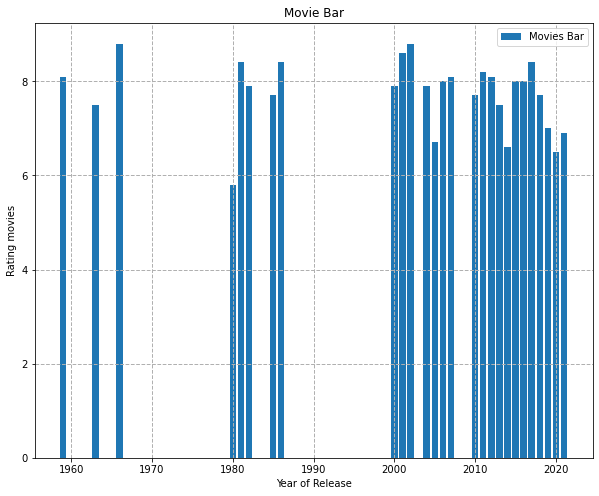

In [177]:
# visualizations

plt.figure(figsize=(10, 8))
plt.bar(movie_year, movie_rating, label = 'Movies Bar')
plt.xlabel('Year of Release')
plt.ylabel('Rating movies')
plt.title('Movie Bar')
plt.legend()
plt.grid(True, linestyle ='--', linewidth = 1)
plt.show()


In [178]:
# converted movie duration into int

converted_duration = []
for i in movie_runtime:
    duration = int(i.replace('min', ""))
    converted_duration.append(duration)
print(converted_duration)

[143, 142, 179, 147, 115, 210, 124, 143, 144, 141, 144, 115, 151, 131, 114, 117, 212, 138, 104, 130, 125, 142, 86, 137, 127, 101, 146, 114, 114, 108, 146, 88, 115, 144, 115, 132, 105, 161, 143, 102, 115, 115, 142, 147, 132, 156, 122, 110, 111, 99]


In [179]:
# normalized value

df = pd.DataFrame({
               'Rating': movie_rating,
               'Duration': converted_duration
              })
normalized_df = (df - df.min()) / (df.max() - df.min())
print(normalized_df)


      Rating  Duration
0   0.527778  0.452381
1   0.750000  0.444444
2   1.000000  0.738095
3   0.694444  0.484127
4   0.500000  0.230159
5   0.638889  0.984127
6   0.500000  0.301587
7   0.805556  0.452381
8   0.472222  0.460317
9   0.388889  0.436508
10  0.527778  0.460317
11  0.888889  0.230159
12  0.055556  0.515873
13  0.472222  0.357143
14  0.694444  0.222222
15  0.555556  0.246032
16  0.805556  1.000000
17  0.750000  0.412698
18  0.166667  0.142857
19  0.833333  0.349206
20  0.944444  0.309524
21  0.388889  0.444444
22  0.000000  0.000000
23  0.888889  0.404762
24  0.611111  0.325397
25  0.111111  0.119048
26  0.694444  0.476190
27  0.666667  0.222222
28  0.388889  0.222222
29  0.777778  0.174603
30  0.638889  0.476190
31  0.138889  0.015873
32  0.416667  0.230159
33  0.777778  0.460317
34  0.472222  0.230159
35  0.500000  0.365079
36  0.888889  0.150794
37  1.000000  0.595238
38  0.472222  0.452381
39  0.638889  0.126984
40  0.750000  0.230159
41  0.138889  0.230159
42  0.38888

In [180]:
# join scraped data into a dataframe

imdb_movie = pd.DataFrame({ 'Movie Name' : movie_name,
               'Yaer of Release': movie_year,
                'Duration': movie_runtime,
                'Genre': movie_genre,
                'Rating': movie_rating,
                 })

imdb_movie

,Movie Name,Yaer of Release,Duration,Genre,Rating
0,Man of Steel,2013,143 min,"Action, Adventure, Sci-Fi",7.1
1,Harry Potter und der Gefangene von Askaban,2004,142 min,"Adventure, Family, Fantasy",7.9
2,Der Herr der Ringe: Die zwei Türme,2002,179 min,"Action, Adventure, Drama",8.8
3,Mission: Impossible - Fallout,2018,147 min,"Action, Adventure, Thriller",7.7
4,Thor,2011,115 min,"Action, Adventure, Fantasy",7.0
5,"Eine total, total verrückte Welt",1963,210 min,"Action, Adventure, Comedy",7.5
6,Prometheus - Dunkle Zeichen,2012,124 min,"Adventure, Mystery, Sci-Fi",7.0
7,The Avengers,2012,143 min,"Action, Adventure, Sci-Fi",8.1
8,X-Men: Apocalypse,2016,144 min,"Action, Adventure, Sci-Fi",6.9
9,Die versunkene Stadt Z,2016,141 min,"Adventure, Biography, Drama",6.6
